<a href="https://www.kaggle.com/code/kirtimathur/hotel-booking-eda?scriptVersionId=124042389" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-booking-demand/hotel_bookings.csv


#### Reading the data

In [2]:
df=pd.read_csv("/kaggle/input/hotel-booking-demand/hotel_bookings.csv")

# Basic understanding of data

#### Shape of data

In [3]:
df.shape

(119390, 32)

#### Columns of data

In [4]:
k=1
for i in df.columns:
    print(k,"---",i)
    k+=1

1 --- hotel
2 --- is_canceled
3 --- lead_time
4 --- arrival_date_year
5 --- arrival_date_month
6 --- arrival_date_week_number
7 --- arrival_date_day_of_month
8 --- stays_in_weekend_nights
9 --- stays_in_week_nights
10 --- adults
11 --- children
12 --- babies
13 --- meal
14 --- country
15 --- market_segment
16 --- distribution_channel
17 --- is_repeated_guest
18 --- previous_cancellations
19 --- previous_bookings_not_canceled
20 --- reserved_room_type
21 --- assigned_room_type
22 --- booking_changes
23 --- deposit_type
24 --- agent
25 --- company
26 --- days_in_waiting_list
27 --- customer_type
28 --- adr
29 --- required_car_parking_spaces
30 --- total_of_special_requests
31 --- reservation_status
32 --- reservation_status_date


#### Head of data

In [5]:
df.head().iloc[:,0:16]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO


In [6]:
df.head().iloc[:,16:32]

,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


#### Columns description

hotel

- Hotel (H1 = Resort Hotel or H2 = City Hotel)

is_canceled

- Value indicating if the booking was canceled (1) or not (0)

lead_time

- Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

arrival_date_year

- Year of arrival date

arrival_date_month

- Month of arrival date

arrival_date_week_number

- Week number of year for arrival date

arrival_date_day_of_month

- Day of arrival date

stays_in_weekend_nights

- Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

stays_in_week_nights

- Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

adults

- Number of adults

children

- Number of children

babies

- Number of babies

meal

- Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB      – Full board (breakfast, lunch and dinner)

country

- Country of origin. Categories are represented in the ISO 3155–3:2013 format

market_segment

- Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

distribution_channel

- Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

is_repeated_guest

- Value indicating if the booking name was from a repeated guest (1) or not (0)

previous_cancellations

- Number of previous bookings that were cancelled by the customer prior to the current booking

previous_bookings_not_canceled

- Number of previous bookings not cancelled by the customer prior to the current booking

reserved_room_type

- Code of room type reserved. Code is presented instead of designation for anonymity reasons.

assigned_room_type

- Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

booking_changes

- Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

deposit_type

- Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.

agent

- ID of the travel agency that made the booking

company

- ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

days_in_waiting_list

- Number of days the booking was in the waiting list before it was confirmed to the customer

customer_type

- Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking

adr

- Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

required_car_parking_spaces

- Number of car parking spaces required by the customer

total_of_special_requests

- Number of special requests made by the customer (e.g. twin bed or high floor)

reservation_status

- Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why

reservation_status_date

- Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to

#### Info of data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Unique values of each column and total number of those of unqiue values

In [8]:
#for i in df.columns:
    #print(i,",    Unique values:",df[i].unique(),",    Total unique values:",df[i].nunique())

# Preprocessing

#### Missing values column wise

In [9]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

- From above it is inferred that there are missing values in children, country, agent, and company columns

#### Checking missing values percentage 

In [10]:
for i in df.columns:
    if df[i].isnull().any():
        print(i,(df[i].isnull().sum()*100)/df.shape[0])

children 0.0033503643521232934
country 0.40874445095904177
agent 13.686238378423653
company 94.30689337465449


#### Dropping unnecessary columns with missing values, agent and company

In [11]:
df.drop(['agent','company'],axis=1,inplace=True)

In [12]:
for i in df.columns:
    if df[i].isnull().any():
        print(i,df[i].isnull().sum())

children 4
country 488


#### Country column has 488 rows with the missing values. 488 rows out of 119390 is negligible, so removing those rows.

In [13]:
df.dropna(axis=0,inplace=True)

In [14]:
df.isnull().sum().sum()

0

- Now, there are missing values in the data frame.

In [15]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

# Feature Engineering

#### Lets combine columns children and babies together as kids

In [16]:
df['kids'] = df.children + df.babies

- Now dropping the columns not required.

In [17]:
df.drop(columns=["children","babies"],inplace=True)

# Insights

#### Descriptive Statistical Summary of numeric data

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,118898.0,0.371352,0.483168,0.00,0.0,0.0,1.0,1.0
lead_time,118898.0,104.311435,106.903309,0.00,18.0,69.0,161.0,737.0
arrival_date_year,118898.0,2016.157656,0.707459,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,118898.0,27.166555,13.589971,1.00,16.0,28.0,38.0,53.0
arrival_date_day_of_month,118898.0,15.800880,8.780324,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,118898.0,0.928897,0.996216,0.00,0.0,1.0,2.0,16.0
stays_in_week_nights,118898.0,2.502145,1.900168,0.00,1.0,2.0,3.0,41.0
adults,118898.0,1.858391,0.578576,0.00,2.0,2.0,2.0,55.0
is_repeated_guest,118898.0,0.032011,0.176029,0.00,0.0,0.0,0.0,1.0
previous_cancellations,118898.0,0.087142,0.845869,0.00,0.0,0.0,0.0,26.0


#### Descriptive Statistical Summary of object type data

In [19]:
df.describe(include="object").T

,count,unique,top,freq
hotel,118898,2,City Hotel,79302
arrival_date_month,118898,12,August,13852
meal,118898,5,BB,91863
country,118898,177,PRT,48586
market_segment,118898,7,Online TA,56402
distribution_channel,118898,5,TA/TO,97730
reserved_room_type,118898,10,A,85601
assigned_room_type,118898,12,A,73863
deposit_type,118898,3,No Deposit,104163
customer_type,118898,4,Transient,89174


#### Correlations between all the columns of the data

<AxesSubplot:>

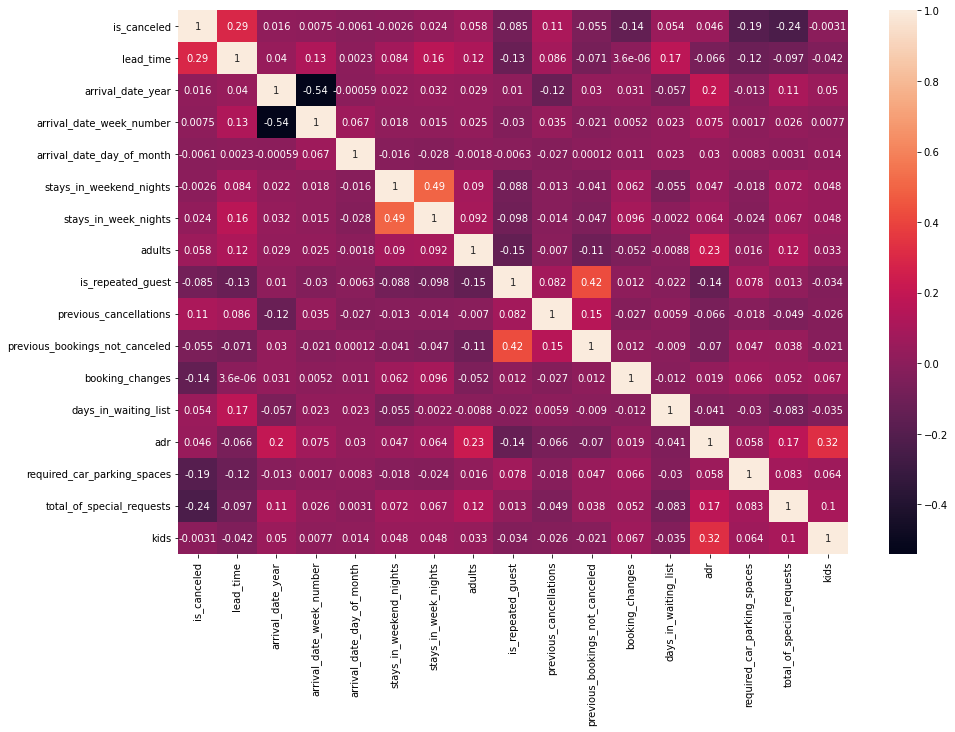

In [20]:
plt.figure(figsize=(15,10))
cor_matrix=df.corr()
sns.heatmap(cor_matrix,annot=True)

- Correlation form above heatmap:
    - arrival_date_week_number and arrival_date_year have a negative correlation of -0.54.
    - stays_in_weekend_nights and stays_in_week_nights have a positive correlation of 0.49.
    - is_repeated_guest and previous_bookings_not_canceled have a positive correlation of 0.42.

#### Type of hotel that was most booked

In [21]:
l=['City Hotel','Resort Hotel']

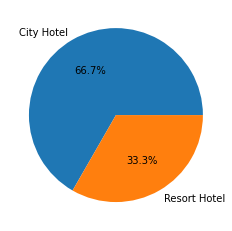

In [22]:
plt.pie(df["hotel"].value_counts(),labels=l,autopct="%0.01f%%")
plt.show()

In [23]:
df["hotel"].value_counts()

City Hotel      79302
Resort Hotel    39596
Name: hotel, dtype: int64

#### Type of hotel that was more cancelled

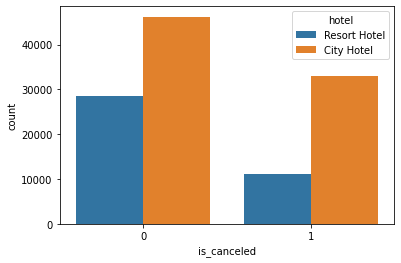

In [24]:
sns.countplot(df["is_canceled"],hue=df["hotel"]);

- Value indicating if the booking was canceled (1) or not (0)
- More than 30,000 times city hotel bookings were cancelled.
- Around 10,000 times Resort hotel bookings were cancelled.

#### Type of hotel according to different years

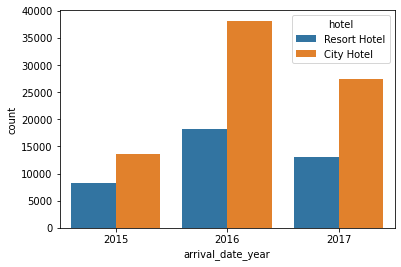

In [25]:
sns.countplot(df["arrival_date_year"],hue=df["hotel"]);

- Overall, most booking were recorded in 2016, where City Hotel had significantly higher bookings. 

#### Type of hotel preferred most for weekend and week nights

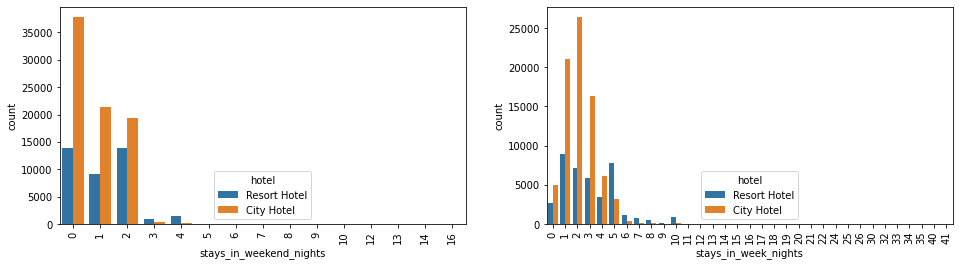

In [26]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.countplot(x=df["stays_in_weekend_nights"],hue=df["hotel"])
plt.xticks(rotation=90);
plt.subplot(1,2,2)
sns.countplot(x=df["stays_in_week_nights"],hue=df["hotel"])
plt.xticks(rotation=90);

- 2 weekend nights was mostly booked for Resort hotel type, 1 weekend night was more booked for City hotel type.
- 1 week night was more booked for Resort hotel type, 2 week night were mostly booked for City hotel type.